# Spotify top songs analysis


# Questions to be analysed:
How many observations are there in this dataset?   
How many features this dataset has?   
Which of the features are categorical?   
Which of the features are numeric?   
Are there any artists that have more than 1 popular track? If yes, which and how many?   
Who was the most popular artist?   
How many artists in total have their songs in the top 50?    
Are there any albums that have more than 1 popular track? If yes, which and how many?   
How many albums in total have their songs in the top 50?   
Which tracks have a danceability score above 0.7?   
Which tracks have a danceability score below 0.4?   
Which tracks have their loudness above -5?   
Which tracks have their loudness below -8?   
Which track is the longest?   
Which track is the shortest?   
Which genre is the most popular?   
Which genres have just one song on the top 50?   
How many genres in total are represented in the top 50?   
Which features are strongly positively correlated?   
Which features are strongly negatively correlated?   
Which features are not correlated?   
How does the danceability score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?   
How does the loudness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?   
How does the acousticness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?   

In [367]:
import csv
import pandas as pd

%matplotlib inline



In [339]:
#Reading data from csv file
songs = pd.read_csv('./data/spotifytoptracks.csv', index_col=0)
print(type(songs))
songs.head(10)

<class 'pandas.core.frame.DataFrame'>


,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul
1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie
2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap
3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic
4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco
5,DaBaby,BLAME IT ON BABY,ROCKSTAR (feat. Roddy Ricch),7ytR5pFWmSjzHJIeQkgog4,0.690,0.746,11,-7.956,0.24700,0.1640,0.000000,0.1010,0.497,89.977,181733,Hip-Hop/Rap
6,Harry Styles,Fine Line,Watermelon Sugar,6UelLqGlWMcVH1E5c4H7lY,0.816,0.548,0,-4.209,0.12200,0.0465,0.000000,0.3350,0.557,95.390,174000,Pop
7,Powfu,death bed (coffee for your head),death bed (coffee for your head),7eJMfftS33KTjuF7lTsMCx,0.431,0.726,8,-8.765,0.73100,0.1350,0.000000,0.6960,0.348,144.026,173333,Hip-Hop/Rap
8,Trevor Daniel,Nicotine,Falling,2rRJrJEo19S2J82BDsQ3F7,0.430,0.784,10,-8.756,0.12300,0.0364,0.000000,0.0887,0.236,127.087,159382,R&B/Hip-Hop alternative
9,Lewis Capaldi,Divinely Uninspired To A Hellish Extent,Someone You Loved,7qEHsqek33rTcFNT9PFqLf,0.405,0.501,1,-5.679,0.75100,0.0319,0.000000,0.1050,0.446,109.891,182161,Alternative/Indie


# Data cleaning

In [377]:
# Checking is there any null values in dataset
songs.isnull().any()

artist              False
album               False
track_name          False
track_id            False
energy              False
danceability        False
key                 False
loudness            False
acousticness        False
speechiness         False
instrumentalness    False
liveness            False
valence             False
tempo               False
duration_ms         False
genre               False
dtype: bool

### Data is clean, no missing values detected

#  How many observations and features are there in this dataset ?

In [137]:
#Using shape function to find out dimensions of data set
print(f'There are {songs.shape[0]} observations and {songs.shape[1]} features in this Spotify top songs dataset')

There are 50 observations and 16 features in this Spotify top songs dataset


#  Duplicates

In [138]:
# Checking is there any duplicates in rows of data set
songs.duplicated().any()

False

In [378]:
# Checking is there any duplicates in columns of data set
songs.columns.duplicated().any()

False

## No duplicates detected

# Categorical features:

##### Artist, Album, Track Name, Track ID, Key,  Genre.


# Numerical  features:

##### Energy, Danceability, Loudness, Acousticness, Speechiness, Instrumentalness, Liveness, Valence, Tempo, Duration ms.

# Outliers treatment
* Energy - Measured from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.  
* Danceability - Measured from 0.0 to 1.0 represents how suitable a track is for dancing based on a combination of musical         elements including tempo, rhythm stability, beat strength, and overall regularity.
* Loudness - The overall loudness of a track in decibels. Values should range between -14.5 -3.28
* Acousticness - Measured from 0.0 to 1.0 Predicts whether the track is acoustic. 1.0 represents high confidence the track is       accustic.
* Speechiness - Speechiness detects the presence of spoken words in a track. Values above 0.66 describe tracks that are probably   made entirely of spoken words. Values below 0.33 most likely represent music and other non-speech-like tracks.
* Instrumentalness - Measured from 0.0 to 1.0. Predicts whether a track contains no vocals. The closer the instrumentalness value   is to 1.0, the greater likelihood the track contains no vocal content.
* Liveness - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that   the track was performed live. > 0.8 High probability that the track is recorded live.
* Valence - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. High Valence - high positivity.
* Key - Its tonic note, which is the starting note for the scale used in the key. Key ranges between 0-12
* duration_ms -( Generally has a range of 200k-400k)
* Link of dataset: https://www.kaggle.com/datasets/atillacolak/top-50-spotify-tracks-2020

In [139]:
# Getting statistical values of columns, checking if there is any outliers and should I inspect columns
songs.describe()

,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.609300,0.716720,5.720000,-6.225900,0.256206,0.124158,0.015962,0.196552,0.555710,119.690460,199955.360000
std,0.154348,0.124975,3.709007,2.349744,0.265250,0.116836,0.094312,0.176610,0.216386,25.414778,33996.122488
min,0.225000,0.351000,0.000000,-14.454000,0.001460,0.029000,0.000000,0.057400,0.060500,75.801000,140526.000000
25%,0.494000,0.672500,2.000000,-7.552500,0.052800,0.048325,0.000000,0.093950,0.434000,99.557250,175845.500000
50%,0.597000,0.746000,6.500000,-5.991500,0.188500,0.070050,0.000000,0.111000,0.560000,116.969000,197853.500000
75%,0.729750,0.794500,8.750000,-4.285500,0.298750,0.155500,0.000020,0.271250,0.726250,132.317000,215064.000000
max,0.855000,0.935000,11.000000,-3.280000,0.934000,0.487000,0.657000,0.792000,0.925000,180.067000,312820.000000


#### No outliers detected 
#### There are some values  more than two standard deviations away from  the mean, but I wont treat them as outliers because they are in given range and it's still value data for analysis

# Artists that have more than 1 popular track:

In [327]:
# Counting values where artist is more than one time in dataset
artist_count = songs['artist'].value_counts()
artist_count.where(artist_count>1).dropna()

Billie Eilish    3.0
Dua Lipa         3.0
Travis Scott     3.0
Justin Bieber    2.0
Harry Styles     2.0
Lewis Capaldi    2.0
Post Malone      2.0
Name: artist, dtype: float64

In [379]:
# Counting total artists that have more than one track
artist_count.where(artist_count>1).count()

7

* There are 7 artists that have more than 1 track in Top 50

# Most popular artist in Spotify top 50

#### In Spotify top 50 songs are  7 artist's that have more than 1 track. Most popular artist's were Billie Eilish 
#### Dua Lipa and  Travis Scott they have 3 songs in top 50 
#### Assuming that indexes are places in top 50 i will count  total indexes values of these most popular artist's with max songs in list
#### and with smallest sum of indexes will be the most popular artitst

In [380]:
# Filtering artists that have more than two tracks
top_artists=artist_count.where(artist_count>2).dropna()
top_artists

Billie Eilish    3.0
Dua Lipa         3.0
Travis Scott     3.0
Name: artist, dtype: float64

In [328]:
# Counting artists index sum , lowest value will be most popular
Billie_Eilish_IndexSum=sum(songs.index[songs.artist.str.contains('BILLIE EILISH', case=False)].tolist())
Dua_Lipa_IndexSum=sum(songs.index[songs.artist.str.contains('Dua Lipa', case=False)].tolist())
Travis_Scott_IndexSum=sum(songs.index[songs.artist.str.contains('Travis Scott', case=False)].tolist())
print(f'Billie Eilish has index values sum of : {Billie_Eilish_IndexSum} , Dua Lipa of : {Dua_Lipa_IndexSum} ,  and Travis Scott of : {Travis_Scott_IndexSum}')

Billie Eilish has index values sum of : 94 , Dua Lipa of : 83 ,  and Travis Scott of : 125


#### Based on sum of indexes Dua Lipa has smallest value , it means songs higher to the top. Dua Lipa is the most popular based on Spotify top 50 songs list 

# How many artists in total have their songs in the top 50? 

In [342]:
# Checking unique values of artists in dataset
total_artists = len(songs.artist.unique())
total_artists

40

#### In Spotify top50 list are 40 different artists 

# Are there any albums that have more than 1 popular track? If yes, which and how many?


In [381]:
# Counting albums in data set and then filtering those wchich were more than one time in dataset
album_count = songs['album'].value_counts()
album_count.where(album_count>1).dropna()

Future Nostalgia        3.0
Hollywood's Bleeding    2.0
Fine Line               2.0
Changes                 2.0
Name: album, dtype: float64

#### In dataset are  4 albums which has more than 1 album song  in Spotify  top 50 list 
#### Album | number of songs
*    Future Nostalgia        3.0
*    Hollywood's Bleeding    2.0
*    Fine Line               2.0
*    Changes                 2.0

#  Total albums which have their songs in the top 50

In [170]:
# Checking lenght of unique values in songs dataframe , album column
total_albums = len(songs.album.unique())
total_albums

45

#### In Spotify top 50 are 45 unique albums 

#  Tracks that  have a danceability score above 0.7 and below 0.4

In [346]:
# Counting total number of songs with danceability higher than 0.7
songs['artist'][songs['danceability'] > 0.7].count()

32

In [347]:
# Counting total number of songs with danceability lower than 0.4
songs['artist'][songs['danceability'] < 0.4].count()

1

#### 32 songs has danceability above 0.7 and just 1 below 0.4. Its much more likely for song to be in top 50 list if it has high danceability 

# Which tracks have their loudness above -5? and below -8?

In [386]:
# Filtering songs where loudness is higher than -5
df[df['loudness'] > -5].sort_values(by = 'loudness', ascending=False)

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
10,KAROL G,Tusa,Tusa,7k4t7uLgtOxPwTpFmtJNTY,0.715,0.803,2,-3.280,0.29500,0.2980,0.000134,0.0574,0.574,101.085,200960,Pop
40,Travis Scott,Birds In The Trap Sing McKnight,goosebumps,6gBFPUFcJLzWGx4lenP6h2,0.728,0.841,7,-3.370,0.08470,0.0484,0.000000,0.1490,0.430,130.049,243837,Hip-Hop/Rap
31,Dua Lipa,Future Nostalgia,Break My Heart,017PF4Q3l4DBUiWoXk4OWT,0.729,0.730,4,-3.434,0.16700,0.0883,0.000001,0.3490,0.467,113.013,221820,Dance-pop/Disco
38,Maluma,PAPI JUANCHO,Hawái,1yoMvmasuxZfqHEipJhRbp,0.727,0.783,6,-3.454,0.18500,0.3890,0.000025,0.0626,0.558,180.067,199112,Pop
12,Post Malone,Hollywood's Bleeding,Circles,21jGcNKet2qwijlDFuPiPb,0.762,0.695,0,-3.497,0.19200,0.0395,0.002440,0.0863,0.553,120.042,215280,Pop/Soft Rock
23,24kGoldn,Mood (feat. iann dior),Mood (feat. iann dior),3tjFYV6RSFtuktYl3ZtYcq,0.722,0.700,7,-3.558,0.22100,0.0369,0.000000,0.2720,0.756,90.989,140526,Pop rap
21,Harry Styles,Fine Line,Adore You,3jjujdWJ72nww5eGnfs2E7,0.771,0.676,8,-3.675,0.02370,0.0483,0.000007,0.1020,0.569,99.048,207133,Pop
49,Travis Scott,ASTROWORLD,SICKO MODE,2xLMifQCjDGFmkHkpNLD9h,0.730,0.834,8,-3.714,0.00513,0.2220,0.000000,0.1240,0.446,155.008,312820,Hip-Hop/Rap
48,Dua Lipa,Future Nostalgia,Physical,3AzjcOeAmA57TIOr9zF1ZW,0.844,0.647,0,-3.756,0.01370,0.0457,0.000658,0.1020,0.746,146.967,193829,Dance/Electronic
35,Lady Gaga,Chromatica,Rain On Me (with Ariana Grande),7ju97lgwC2rKQ6wwsf9no9,0.855,0.672,9,-3.764,0.02100,0.0397,0.000000,0.3230,0.646,123.056,182200,Pop


In [387]:
# Filtering songs where loudness is lower than -8
df[df['loudness'] < -8].sort_values(by='loudness', ascending=False)

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
20,Jawsh 685,Savage Love (Laxed - Siren Beat),Savage Love (Laxed - Siren Beat),1xQ6trAsedVPCdbtDAmk0c,0.481,0.767,0,-8.520,0.2340,0.0803,0.000000,0.2690,0.7610,150.076,171375,Hip-Hop/Rap
8,Trevor Daniel,Nicotine,Falling,2rRJrJEo19S2J82BDsQ3F7,0.430,0.784,10,-8.756,0.1230,0.0364,0.000000,0.0887,0.2360,127.087,159382,R&B/Hip-Hop alternative
36,Travis Scott,HIGHEST IN THE ROOM,HIGHEST IN THE ROOM,3eekarcy7kvN4yt5ZFzltW,0.427,0.598,7,-8.764,0.0546,0.0317,0.000006,0.2100,0.0605,76.469,175721,Hip-Hop/Rap
7,Powfu,death bed (coffee for your head),death bed (coffee for your head),7eJMfftS33KTjuF7lTsMCx,0.431,0.726,8,-8.765,0.7310,0.1350,0.000000,0.6960,0.3480,144.026,173333,Hip-Hop/Rap
15,Drake,Dark Lane Demo Tapes,Toosie Slide,466cKvZn1j45IpxDdYZqdA,0.490,0.830,1,-8.820,0.2890,0.2090,0.000003,0.1130,0.8450,81.604,247059,Hip-Hop/Rap
47,JP Saxe,If the World Was Ending (feat. Julia Michaels),If the World Was Ending - feat. Julia Michaels,2kJwzbxV2ppxnQoYw4GLBZ,0.473,0.464,1,-10.086,0.8660,0.1290,0.000000,0.1090,0.6040,75.801,208687,Pop
44,Billie Eilish,lovely (with Khalid),lovely (with Khalid),0u2P5u6lvoDfwTYjAADbn4,0.296,0.351,4,-10.109,0.9340,0.0333,0.000000,0.0950,0.1200,115.284,200186,Chamber pop
26,Billie Eilish,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",bad guy,2Fxmhks0bxGSBdJ92vM42m,0.425,0.701,7,-10.965,0.3280,0.3750,0.130000,0.1000,0.5620,135.128,194088,Electro-pop
24,Billie Eilish,everything i wanted,everything i wanted,3ZCTVFBt2Brf31RLEnCkWJ,0.225,0.704,6,-14.454,0.9020,0.0994,0.657000,0.1060,0.2430,120.006,245426,Pop


# Which track is longest and shortest? 

In [383]:
# Locating track with the biggest duration value in dataset
df.iloc[df['duration_ms'].idxmax()][['artist','track_name','duration_ms']]

artist         Travis Scott
track_name       SICKO MODE
duration_ms          312820
Name: 49, dtype: object

* Longest track : Travis Scott  SICKO MODE

In [384]:
## Locating track with the smallest duration value in dataset
df.iloc[df['duration_ms'].idxmin()][['artist','track_name','duration_ms']]

artist                       24kGoldn
track_name     Mood (feat. iann dior)
duration_ms                    140526
Name: 23, dtype: object

* Shortest track  : 24kGoldn  Mood (feat. iann dior)

#  Which genre is the most popular?

In [356]:
# Grouping by genre and than counting values of genre in data set
popular_genre = df.groupby(['genre'])['genre'].count().sort_values(ascending=False)
popular_genre.head(5)

genre
Pop                  14
Hip-Hop/Rap          13
Dance/Electronic      5
Alternative/Indie     4
 Electro-pop          2
Name: genre, dtype: int64

* Most popular genre is  Pop 

#  Which genres have just one song on the top 50?

In [382]:
# Filtering genres that is one time in dataset 
popular_genre[popular_genre == 1]

genre
Alternative/reggaeton/experimental    1
Chamber pop                           1
Dance-pop/Disco                       1
Disco-pop                             1
Dreampop/Hip-Hop/R&B                  1
Hip-Hop/Trap                          1
Nu-disco                              1
Pop rap                               1
Pop/Soft Rock                         1
R&B/Hip-Hop alternative               1
Name: genre, dtype: int64

# Which features are strongly positively correlated? Which features are strongly negatively correlated? Which features are not correlated?

Text(0.5, 1.0, 'Features correlation')

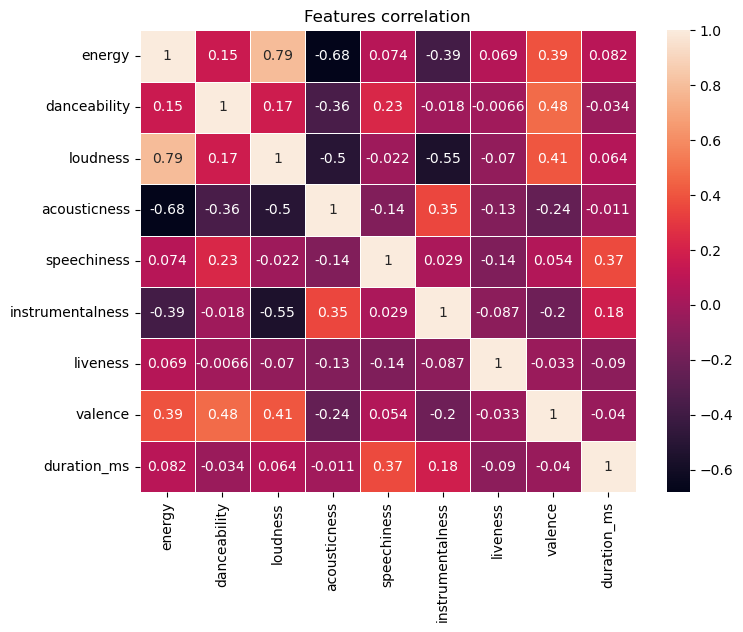

In [324]:
# Generate a heat map to visualize correlation between features using seaborn library imported below

import seaborn as sns

numerical_features = list(['energy', 'danceability', 'loudness', 'acousticness', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'duration_ms'])
correlation = df[numerical_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, linewidths=.5).set_title('Features correlation')

* Energy and loudness are strongly positive correlated and noticeably with valence and danceability. Strongly negatively correlated with acousticness and istrumentalness
* Danceability strongly correlated with valence and more noticebly with energy and loudness
* Valence is positively correlated with energy, danceability and loudness. Other correlation values are around zero
* Loudness is strongly correlated with valence and energy. Strongly negatively correlated with acousticness and istrumentalness
* Acousticness is negatively correlated with loudness and energy, and positively correlated with instrumentalness.
* Speechiness is strongly correlated with duration and more noticebly with danceability, other vaues are around 0
* Instrumentalness is positively correlated with acousticness and  strongly negatively correlated with energy and loudness,more noticibly with valence.
* Liveness has correlation with other features around zero
* There's a positive correlation between duration and speechiness, the more its duration the higher the speechiness. There's correlation between duration and other features.
* Duration correlates with speechiness , other values are around zero


#### From correlation table i can spot that there is two grops where features correlates. 1 group is: Energy, loudness, valence , danceability. Second is:  Instrumentalness , acousticness.


# How does the danceability, loudness and acousticness scores compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres? 

In [325]:
selected_features = ['danceability', 'loudness', 'acousticness']
selected_genres = ['Pop', 'Hip-Hop/Rap', 'Dance/Electronic', 'Alternative/Indie']

In [366]:
df.groupby(['genre'])[selected_features].aggregate([np.mean, np.max, np.min,np.std]).loc[selected_genres]

danceability                          loudness         \
                          mean   amax   amin       std      mean   amax   
genre                                                                     
Pop                   0.677571  0.806  0.464  0.109853 -6.460357 -3.280   
Hip-Hop/Rap           0.765538  0.896  0.598  0.085470 -6.917846 -3.370   
Dance/Electronic      0.755000  0.880  0.647  0.094744 -5.338000 -3.756   
Alternative/Indie     0.661750  0.862  0.459  0.211107 -5.421000 -4.746   

                                    acousticness                            
                     amin       std         mean   amax     amin       std  
genre                                                                       
Pop               -14.454  3.014281     0.323843  0.902  0.02100  0.318142  
Hip-Hop/Rap        -8.820  1.891808     0.188741  0.731  0.00513  0.186396  
Dance/Electronic   -7.567  1.479047     0.099440  0.223  0.01370  0.095828  
Alternative/Indie  -6.401  0.774502     0.583500  0.751  0.29100  0.204086

* Hip-Hop / Rap and Dance / Electronic genres have a higher danceability  in comparison to Pop and Alternative/Indie genres.
* Alternative/Indie has high standard deviation , that means that it can variate more if you want to make to the top50

* Pop and Hip-Hop/Rap mean loudness value is lower than Dance/Electronic and Alternative/Indie. Pop has big standard variation , it variates more . Hip-Hop/Rap and Dance/Electronic has low acousicness  mean value so it tends to be not acoustic .

* The most acoustic genre is Alternative / Indie with 0.58 mean value and it . Second is Pop but it has big standart deviation so it variates a lot , can be acoustic and not. Dance/Electronic has smallest acousticness value second is Hip-Hop/Rap

#  Summary

* In spotify top50  are forty total artists, seven of them have more than one song, the most popular artist is "Dua Lipa"
* In spotify top50  are forty five total albums, four albums have more than one track in dataset , the most popular album is Future Nostalgia by Dua Lipa
* In spotify top50  are thirty two songs that has danceability higher than 0.7 and just one lower than 0.4
* The longest song is Travis Scott SICKO MODE and the shortest is 24kGoldn Mood (feat. iann dior)
* There are 16 separate genres in dataset , Pop is the most popular of them
* There are two groups of features that tends to correlate and negatively correlate with other group features
* First group is Energy, loudness, valence , danceability. Second is : Instrumentalness , acousticness. So if you want to make song that should hit danceflor and  make to spotify top 50, pay more attention to group one , if you want to make lyrical song with instruments , pay attention to group two
